# Project : Image Classification and Regression, MVA - CentraleSupelec
## Bettina Sarafis

### 2. Getting started

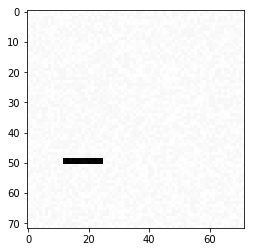

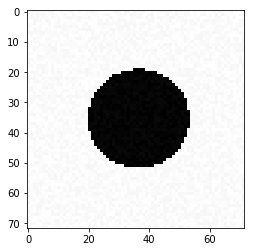

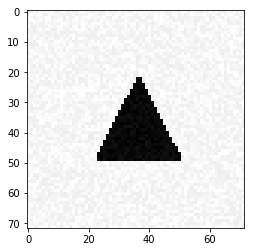

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# On some implementations of matplotlib, you may need to change this value
IMAGE_SIZE = 72

def generate_a_drawing(figsize, U, V, noise=0.0):
    fig = plt.figure(figsize=(figsize,figsize))
    ax = plt.subplot(111)
    plt.axis('Off')
    ax.set_xlim(0,figsize)
    ax.set_ylim(0,figsize)
    ax.fill(U, V, "k")
    fig.canvas.draw()
    imdata = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)[::3].astype(np.float32)
    imdata = imdata + noise * np.random.random(imdata.size)
    plt.close(fig)
    return imdata

def generate_a_rectangle(noise=0.0, free_location=False):
    figsize = 1.0    
    U = np.zeros(4)
    V = np.zeros(4)
    if free_location:
        corners = np.random.random(4)
        top = max(corners[0], corners[1])
        bottom = min(corners[0], corners[1])
        left = min(corners[2], corners[3])
        right = max(corners[2], corners[3])
    else:
        side = (0.3 + 0.7 * np.random.random()) * figsize
        top = figsize/2 + side/2
        bottom = figsize/2 - side/2
        left = bottom
        right = top
    U[0] = U[1] = top
    U[2] = U[3] = bottom
    V[0] = V[3] = left
    V[1] = V[2] = right
    return generate_a_drawing(figsize, U, V, noise)


def generate_a_disk(noise=0.0, free_location=False):
    figsize = 1.0
    if free_location:
        center = np.random.random(2)
    else:
        center = (figsize/2, figsize/2)
    radius = (0.3 + 0.7 * np.random.random()) * figsize/2
    N = 50
    U = np.zeros(N)
    V = np.zeros(N)
    i = 0
    for t in np.linspace(0, 2*np.pi, N):
        U[i] = center[0] + np.cos(t) * radius
        V[i] = center[1] + np.sin(t) * radius
        i = i + 1
    return generate_a_drawing(figsize, U, V, noise)

def generate_a_triangle(noise=0.0, free_location=False):
    figsize = 1.0
    if free_location:
        U = np.random.random(3)
        V = np.random.random(3)
    else:
        size = (0.3 + 0.7 * np.random.random())*figsize/2
        middle = figsize/2
        U = (middle, middle+size, middle-size)
        V = (middle+size, middle-size, middle-size)
    imdata = generate_a_drawing(figsize, U, V, noise)
    return [imdata, [U[0], V[0], U[1], V[1], U[2], V[2]]]

im = generate_a_rectangle(10, True)
plt.imshow(im.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')
plt.show()

im = generate_a_disk(10)
plt.imshow(im.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')
plt.show()

[im, v] = generate_a_triangle(20, False)
plt.imshow(im.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')
plt.show()

def generate_dataset_classification(nb_samples, noise=0.0, free_location=False):
    # Getting im_size:
    im_size = generate_a_rectangle().shape[0]
    X = np.zeros([nb_samples,im_size])
    Y = np.zeros(nb_samples)
    for i in range(nb_samples):
        category = np.random.randint(3)
        if category == 0:
            X[i] = generate_a_rectangle(noise, free_location)
        elif category == 1: 
            X[i] = generate_a_disk(noise, free_location)
        else:
            [X[i], V] = generate_a_triangle(noise, free_location)
        Y[i] = category
    X = (X + noise) / (255 + 2 * noise)
    return [X, Y]

def generate_test_set_classification():
    np.random.seed(42)
    [X_test, Y_test] = generate_dataset_classification(300, 20, True)
    Y_test = np_utils.to_categorical(Y_test, 3) 
    return [X_test, Y_test]

def generate_dataset_regression(nb_samples, noise=0.0):
    # Getting im_size:
    im_size = generate_a_triangle()[0].shape[0]
    X = np.zeros([nb_samples,im_size])
    Y = np.zeros([nb_samples, 6])
    for i in range(nb_samples):
        [X[i], Y[i]] = generate_a_triangle(noise, True)
    X = (X + noise) / (255 + 2 * noise)
    return [X, Y]

import matplotlib.patches as patches

def visualize_prediction(x, y):
    fig, ax = plt.subplots(figsize=(5, 5))
    I = x.reshape((IMAGE_SIZE,IMAGE_SIZE))
    ax.imshow(I, extent=[-0.15,1.15,-0.15,1.15],cmap='gray')
    ax.set_xlim([0,1])
    ax.set_ylim([0,1])

    xy = y.reshape(3,2)
    tri = patches.Polygon(xy, closed=True, fill = False, edgecolor = 'r', linewidth = 5, alpha = 0.5)
    ax.add_patch(tri)

    plt.show()

def generate_test_set_regression():
    np.random.seed(42)
    [X_test, Y_test] = generate_dataset_regression(300, 20)
    return [X_test, Y_test]

### 3. Simple Classification

In [2]:
[X_train, Y_train] = generate_dataset_classification(300, 20)

In [3]:
from keras.utils import np_utils

size = 72
X_train = X_train.reshape(X_train.shape[0], size, size, 1)
Y_train = np_utils.to_categorical(Y_train, num_classes=3)

Using TensorFlow backend.


Model1 is the model using SGD as optimizer :

In [4]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, Activation, Flatten

model1 = Sequential()
#input size = 72*72
model1.add(Flatten(input_shape=(size,size,1)))
model1.add(Dense(3, activation='softmax'))

In [5]:
from keras import optimizers

sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model1.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
model1.fit(X_train, Y_train, batch_size=32, epochs=10)

Epoch 1/10
300/300 [==============================] - 0s 221us/step - loss: 9.4825 - acc: 0.3200
Epoch 2/10
300/300 [==============================] - 0s 58us/step - loss: 10.9603 - acc: 0.3200
Epoch 3/10
300/300 [==============================] - 0s 67us/step - loss: 10.9603 - acc: 0.3200
Epoch 4/10
300/300 [==============================] - 0s 57us/step - loss: 10.9603 - acc: 0.3200
Epoch 5/10
300/300 [==============================] - 0s 68us/step - loss: 10.9603 - acc: 0.3200
Epoch 6/10
300/300 [==============================] - 0s 69us/step - loss: 10.9603 - acc: 0.3200
Epoch 7/10
300/300 [==============================] - 0s 70us/step - loss: 10.9603 - acc: 0.3200
Epoch 8/10
300/300 [==============================] - 0s 83us/step - loss: 10.9603 - acc: 0.3200
Epoch 9/10
300/300 [==============================] - 0s 68us/step - loss: 10.9603 - acc: 0.3200
Epoch 10/10
300/300 [==============================] - 0s 72us/step - loss: 10.9603 - acc: 0.3200


Model2 is the model using ADAM as optimizer :

In [6]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, Activation, Flatten

model2 = Sequential()
model2.add(Flatten(input_shape=(size,size,1)))
#We are in multiclassification, that's why we use softmax!
model2.add(Dense(3, activation='softmax'))

In [7]:
from keras import optimizers

model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model2.fit(X_train, Y_train, batch_size=32, epochs=10, verbose=1)

Epoch 1/10
300/300 [==============================] - 0s 307us/step - loss: 1.9297 - acc: 0.3733
Epoch 2/10
300/300 [==============================] - 0s 62us/step - loss: 1.1480 - acc: 0.4600
Epoch 3/10
300/300 [==============================] - 0s 75us/step - loss: 0.6315 - acc: 0.6667
Epoch 4/10
300/300 [==============================] - 0s 73us/step - loss: 0.4299 - acc: 0.8100
Epoch 5/10
300/300 [==============================] - 0s 64us/step - loss: 0.3541 - acc: 0.8867
Epoch 6/10
300/300 [==============================] - 0s 77us/step - loss: 0.3018 - acc: 0.9467
Epoch 7/10
300/300 [==============================] - 0s 72us/step - loss: 0.2610 - acc: 0.9433
Epoch 8/10
300/300 [==============================] - 0s 62us/step - loss: 0.2513 - acc: 0.9333
Epoch 9/10
300/300 [==============================] - 0s 76us/step - loss: 0.2207 - acc: 0.9600
Epoch 10/10
300/300 [==============================] - 0s 72us/step - loss: 0.1894 - acc: 0.9800


I verify my models using the same test dataset [X_test,Y_test] :

In [8]:
[X_test,Y_test] = generate_dataset_classification(100, 20)
X_test = X_test.reshape(X_test.shape[0], size, size, 1)
predict1 = model1.predict(X_test)
predict2 = model2.predict(X_test)

In [9]:
Accuracy_SGD = 0
Accuracy_ADAM = 0
for i in range(100):
    if(Y_test[i]==np.argmax(predict1[i,:])):
        Accuracy_SGD += 1
    if(Y_test[i]==np.argmax(predict2[i,:])): 
        Accuracy_ADAM += 1
print("Accuracy_SGD : %s"%Accuracy_SGD)
print("Accuracy_ADAM : %s"%Accuracy_ADAM)

Accuracy_SGD : 33
Accuracy_ADAM : 97


In [10]:
Y_test = np_utils.to_categorical(Y_test, num_classes=3)

In [11]:
score_SGD = model1.evaluate(X_test, Y_test, verbose=0)
score_ADAM = model2.evaluate(X_test, Y_test, verbose=0)
print("SGD Linear Classifier : Loss function %s and Accuracy %s."%(score_SGD[0],score_SGD[1]))
print("ADAM Linear Classifier : Loss function %s and Accuracy %s."%(score_ADAM[0],score_ADAM[1]))

SGD Linear Classifier : Loss function 10.799123611450195 and Accuracy 0.33.
ADAM Linear Classifier : Loss function 0.21717909336090088 and Accuracy 0.97.


We can say that using ADAM optimizer is better than using the SGD one : ADAM gives a better loss function value and accuracy.

### 4. Visualization of the Solution

We will only look at the ADAM model weights :

In [12]:
weights = model2.get_weights()
print(weights[0].shape)
print(weights[0][:,0])

(5184, 3)
[ 0.02384333 -0.02624653 -0.01858772 ...  0.02847402 -0.02606026
  0.03210142]


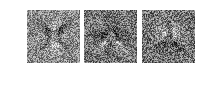

In [13]:
nb_col = weights[0].shape[1]
fig = plt.figure(figsize=(weights[0].shape[1],1))
for i in range(nb_col):
    weights_col = weights[0][:,i].reshape((72,72))
    ax1 = fig.add_subplot(1,nb_col,i+1)
    ax1.imshow(weights_col, cmap='gray')
    ax1.axis('off')

plt.subplots_adjust(wspace=0.1, hspace=0.1)
plt.show()

### 5. A More Difficult Classification Problem

In [14]:
[X_train, Y_train] = generate_dataset_classification(300, 20, True)

size = 72
X_train = X_train.reshape(X_train.shape[0], size, size, 1)
Y_train = np_utils.to_categorical(Y_train, num_classes=3)

I train my Linear Classifier model on this new train dataset :

In [15]:
linear_classifier = Sequential()
linear_classifier.add(Flatten(input_shape=(size,size,1)))
linear_classifier.add(Dense(3, activation='softmax'))

In [16]:
linear_classifier.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
linear_classifier.fit(X_train, Y_train, batch_size=32, epochs=10, verbose=0)

In [17]:
[X_test, Y_test] = generate_test_set_classification()
X_test = X_test.reshape(X_test.shape[0], size, size, 1)

In [18]:
score_linear_classifier = linear_classifier.evaluate(X_test, Y_test, verbose=0)
print("ADAM Linear Classifier on this new train dataset : Loss function %s and Accuracy %s."%(score_linear_classifier[0],score_linear_classifier[1]))


ADAM Linear Classifier on this new train dataset : Loss function 0.8788570968310038 and Accuracy 0.573333334128062.


This is my convolutional deep network :

In [19]:
model3 = Sequential()
model3.add(Conv2D(16, (5, 5), activation='relu', input_shape=(size, size, 1)))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Flatten())
model3.add(Dense(3, activation='softmax'))

In [20]:
model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model3.fit(X_train, Y_train, batch_size=32, epochs=10, verbose=1)

Epoch 1/10
300/300 [==============================] - 0s 1ms/step - loss: 1.4856 - acc: 0.3800
Epoch 2/10
300/300 [==============================] - 0s 1ms/step - loss: 0.9587 - acc: 0.6400
Epoch 3/10
300/300 [==============================] - 0s 1ms/step - loss: 0.8338 - acc: 0.7133
Epoch 4/10
300/300 [==============================] - 0s 1ms/step - loss: 0.7430 - acc: 0.7433
Epoch 5/10
300/300 [==============================] - 0s 1ms/step - loss: 0.6456 - acc: 0.8267
Epoch 6/10
300/300 [==============================] - 0s 1ms/step - loss: 0.5946 - acc: 0.7800
Epoch 7/10
300/300 [==============================] - 0s 1ms/step - loss: 0.5312 - acc: 0.8400
Epoch 8/10
300/300 [==============================] - 0s 1ms/step - loss: 0.5094 - acc: 0.8433
Epoch 9/10
300/300 [==============================] - 0s 1ms/step - loss: 0.4545 - acc: 0.8833
Epoch 10/10
300/300 [==============================] - 0s 1ms/step - loss: 0.4222 - acc: 0.8933


In [21]:
score_CNN = model3.evaluate(X_test, Y_test)
print("Convolutional deep network on this train dataset : Loss function %s and Accuracy %s."%(score_CNN[0],score_CNN[1]))

300/300 [==============================] - 0s 541us/step
Convolutional deep network on this train dataset : Loss function 0.6700590229034424 and Accuracy 0.693333334128062.


### 6. A Regression Problem

In [45]:
[X_train, Y_train] = generate_dataset_regression(300, 20)
#Each Y represents the three vertices 

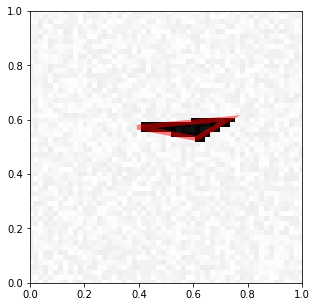

In [46]:
visualize_prediction(X_train[2], Y_train[2])

I organize my vertices with respect to counterclockwise direction :

In [47]:
def trigo_ordered_trainset(Y_train):
    Y_train_ordered = np.zeros(Y_train.shape)
    for i in range(Y_train.shape[0]):
        new = []
        u = [Y_train[i,1],Y_train[i,3],Y_train[i,5]]
        new = [Y_train[i,(2*np.argmax(u)+1)-1]]
        new.append(Y_train[i,(2*np.argmax(u)+1)])
        if(np.argmax(u)==0):
            v = [-1,Y_train[i,2],Y_train[i,4]]
        if(np.argmax(u)==1):
            v =[Y_train[i,0],-1,Y_train[i,4]]
        if(np.argmax(u)==2):
            v=[Y_train[i,0],Y_train[i,2],-1]
        new.append(Y_train[i,2*np.argmax(v)])
        new.append(Y_train[i,(2*np.argmax(v)+1)])
        if(np.argmax(u)!=0 and np.argmax(v)!=0):
            new.append(Y_train[i,0])
            new.append(Y_train[i,1])
        if(np.argmax(u)!=1 and np.argmax(v)!=1):
            new.append(Y_train[i,2])
            new.append(Y_train[i,3])
        if(np.argmax(u)!=2 and np.argmax(v)!=2):
            new.append(Y_train[i,4])
            new.append(Y_train[i,5])
        Y_train_ordered[i,:] = new
    return Y_train_ordered    

In [48]:
Y_train_ordered = trigo_ordered_trainset(Y_train)

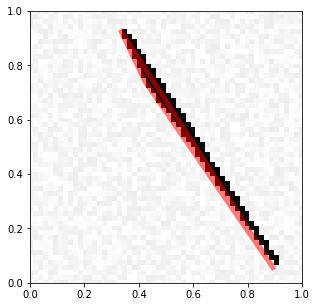

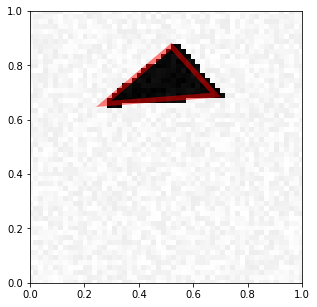

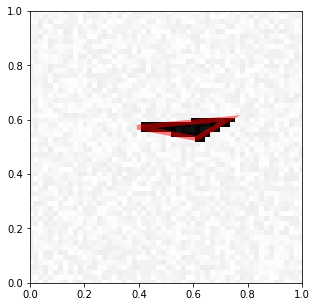

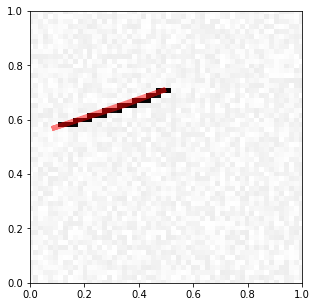

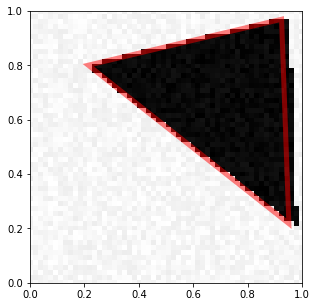

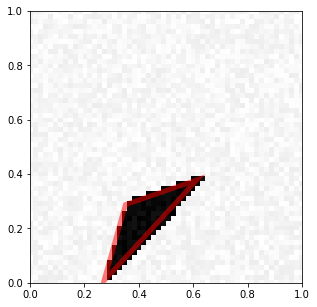

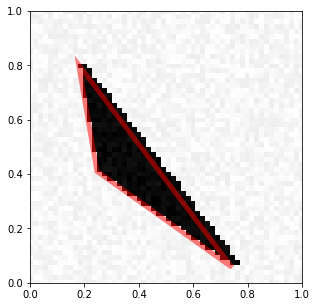

In [49]:
visualize_prediction(X_train[0], Y_train_ordered[0])
visualize_prediction(X_train[1], Y_train_ordered[1])
visualize_prediction(X_train[2], Y_train_ordered[2])
visualize_prediction(X_train[3], Y_train_ordered[3])
visualize_prediction(X_train[4], Y_train_ordered[4])
visualize_prediction(X_train[5], Y_train_ordered[5])
visualize_prediction(X_train[6], Y_train_ordered[6])

I can see above that my ordered Y give me the same vizualization.

In [50]:
from sklearn.preprocessing import normalize
from sklearn.preprocessing import scale
X_train = X_train.reshape(X_train.shape[0], size, size, 1)

#Normalization : 
var_train = np.std(Y_train_ordered,1)
mean_train = np.mean(Y_train_ordered,1)
Y_train_ordered = scale(Y_train_ordered, axis=1)

Y_train_denormalize = np.zeros(Y_train.shape)
for i in range(Y_train.shape[0]):
    Y_train_denormalize[i] = np.copy(Y_train_ordered[i])*var_train[i] + mean_train[i]

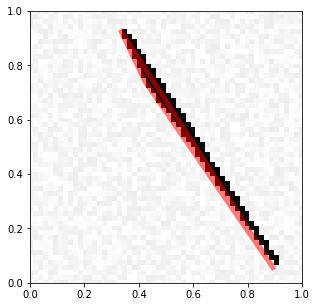

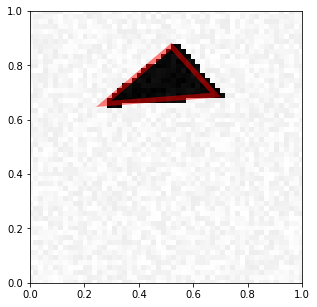

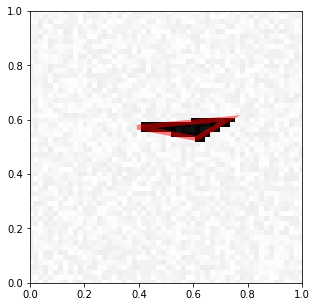

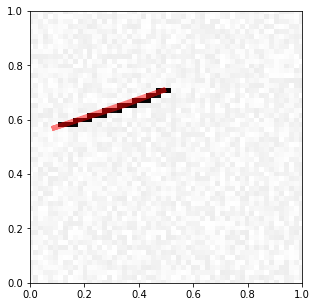

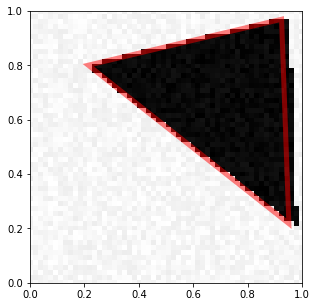

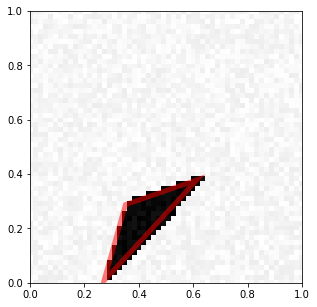

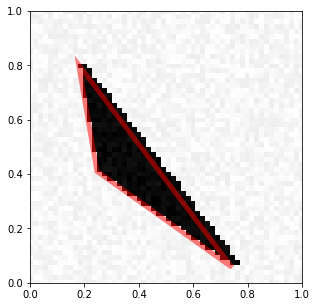

In [51]:
visualize_prediction(X_train[0], Y_train_denormalize[0])
visualize_prediction(X_train[1], Y_train_denormalize[1])
visualize_prediction(X_train[2], Y_train_denormalize[2])
visualize_prediction(X_train[3], Y_train_denormalize[3])
visualize_prediction(X_train[4], Y_train_denormalize[4])
visualize_prediction(X_train[5], Y_train_denormalize[5])
visualize_prediction(X_train[6], Y_train_denormalize[6])

In [52]:
model4 = Sequential()
model4.add(Conv2D(32, (3, 3), activation='relu', input_shape=(size, size, 1)))
model4.add(MaxPooling2D(pool_size=(2, 2)))
model4.add(Dropout(0.25))

model4.add(Conv2D(32, (3,3), activation='relu', input_shape=(35,35,32)))
model4.add(MaxPooling2D(pool_size=(2, 2)))
model4.add(Dropout(0.25))

model4.add(Flatten())

model4.add(Dense(100, activation='relu'))
model4.add(Dense(128))
model4.add(Dense(6))

In [53]:
model4.compile(loss='mean_squared_error', optimizer='adam')
model4.fit(X_train, Y_train_ordered, batch_size=4, epochs=100)

Epoch 1/100
300/300 [==============================] - 2s 8ms/step - loss: 0.6126
Epoch 2/100
300/300 [==============================] - 2s 6ms/step - loss: 0.3929
Epoch 3/100
300/300 [==============================] - 2s 6ms/step - loss: 0.2977
Epoch 4/100
300/300 [==============================] - 2s 6ms/step - loss: 0.2097
Epoch 5/100
300/300 [==============================] - 2s 6ms/step - loss: 0.1490
Epoch 6/100
300/300 [==============================] - 2s 6ms/step - loss: 0.1180
Epoch 7/100
300/300 [==============================] - 2s 6ms/step - loss: 0.0848
Epoch 8/100
300/300 [==============================] - 2s 6ms/step - loss: 0.0787
Epoch 9/100
300/300 [==============================] - 2s 6ms/step - loss: 0.0598
Epoch 10/100
300/300 [==============================] - 2s 7ms/step - loss: 0.0503
Epoch 11/100
300/300 [==============================] - 2s 7ms/step - loss: 0.0426
Epoch 12/100
300/300 [==============================] - 2s 6ms/step - loss: 0.0381
Epoch 13/100


300/300 [==============================] - 2s 6ms/step - loss: 0.0098
Epoch 100/100
300/300 [==============================] - 2s 6ms/step - loss: 0.0115


In [61]:
[X_test, Y_test] = generate_test_set_regression()

In [62]:
Y_test_ordered = trigo_ordered_trainset(Y_test)

In [63]:
X_test = X_test.reshape(X_test.shape[0], size, size, 1)

var_test = np.std(Y_test_ordered,1)
mean_test = np.mean(Y_test_ordered,1)

#Normalization : 
Y_test_ordered = scale(Y_test_ordered, axis = 1)

In [64]:
evalu2 = model4.evaluate(X_test, Y_test_ordered)
print("La valeur de la loss function sur ce test dataset vaut : %s."%evalu2)

300/300 [==============================] - 0s 896us/step
La valeur de la loss function sur ce test dataset vaut : 0.1913069220383962.


In [65]:
Y_predict = model4.predict(X_test)

To visualize my predictions, I need to denormalize :

In [66]:
Y_predict_denormalized = np.zeros(Y_predict.shape)
for i in range(Y_predict.shape[0]):
    Y_predict_denormalized[i] = np.copy(Y_predict[i])*var_test[i] + mean_test[i]

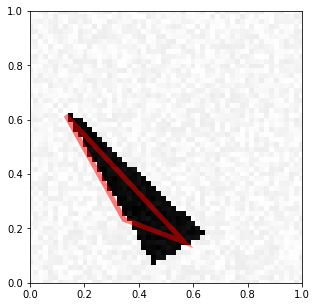

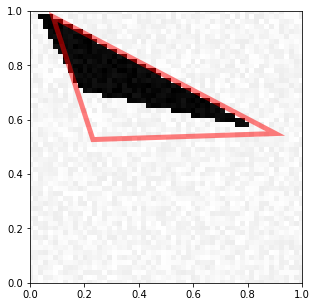

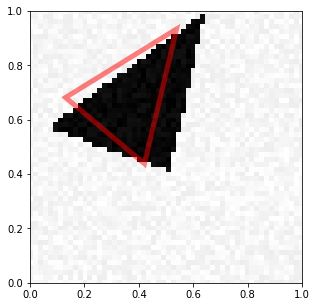

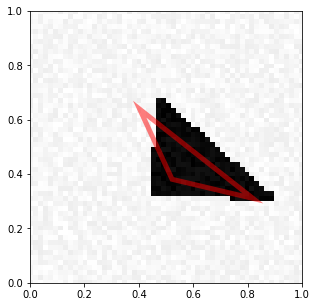

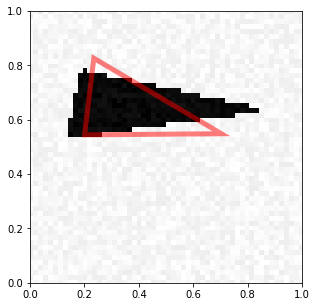

In [73]:
i = 15
visualize_prediction(X_test[i], Y_predict_denormalized[i])
visualize_prediction(X_test[i+1], Y_predict_denormalized[i+1])
visualize_prediction(X_test[i+2], Y_predict_denormalized[i+2])
visualize_prediction(X_test[i+3], Y_predict_denormalized[i+3])
visualize_prediction(X_test[i+4], Y_predict_denormalized[i+4])

### 7. Image Denoising

In [38]:
def generate_a_noisy_drawing(figsize, U, V, noise=0.0):
    fig = plt.figure(figsize=(figsize,figsize))
    ax = plt.subplot(111)
    plt.axis('Off')
    ax.set_xlim(0,figsize)
    ax.set_ylim(0,figsize)
    ax.fill(U, V, "k")
    fig.canvas.draw()
    imdata = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)[::3].astype(np.float32)
    noisy_imdata = imdata + noise * np.random.random(imdata.size)
    plt.close(fig)
    return noisy_imdata, imdata 

def generate_a_noisy_rectangle(noise=0.0, free_location=False):
    figsize = 1.0    
    U = np.zeros(4)
    V = np.zeros(4)
    if free_location:
        corners = np.random.random(4)
        top = max(corners[0], corners[1])
        bottom = min(corners[0], corners[1])
        left = min(corners[2], corners[3])
        right = max(corners[2], corners[3])
    else:
        side = (0.3 + 0.7 * np.random.random()) * figsize
        top = figsize/2 + side/2
        bottom = figsize/2 - side/2
        left = bottom
        right = top
    U[0] = U[1] = top
    U[2] = U[3] = bottom
    V[0] = V[3] = left
    V[1] = V[2] = right
    return generate_a_noisy_drawing(figsize, U, V, noise)


def generate_a_noisy_disk(noise=0.0, free_location=False):
    figsize = 1.0
    if free_location:
        center = np.random.random(2)
    else:
        center = (figsize/2, figsize/2)
    radius = (0.3 + 0.7 * np.random.random()) * figsize/2
    N = 50
    U = np.zeros(N)
    V = np.zeros(N)
    i = 0
    for t in np.linspace(0, 2*np.pi, N):
        U[i] = center[0] + np.cos(t) * radius
        V[i] = center[1] + np.sin(t) * radius
        i = i + 1
    return generate_a_noisy_drawing(figsize, U, V, noise)

def generate_a_noisy_triangle(noise=0.0, free_location=False):
    figsize = 1.0
    if free_location:
        U = np.random.random(3)
        V = np.random.random(3)
    else:
        size = (0.3 + 0.7 * np.random.random())*figsize/2
        middle = figsize/2
        U = (middle, middle+size, middle-size)
        V = (middle+size, middle-size, middle-size)
    imdata = generate_a_noisy_drawing(figsize, U, V, noise)
    return imdata

def generate_dataset_noisy(nb_samples, noise=100.0, free_location=False):
    # Getting im_size:
    im_size = generate_a_rectangle().shape[0]
    X = np.zeros([nb_samples,im_size])
    noisy_X = np.zeros([nb_samples,im_size])

    for i in range(nb_samples):
        category = np.random.randint(3)
        if category == 0:
            noisy_X[i], X[i] = generate_a_noisy_rectangle(noise, free_location)
        elif category == 1: 
            noisy_X[i], X[i] = generate_a_noisy_disk(noise, free_location)
        else:
            noisy_X[i], X[i] = generate_a_noisy_triangle(noise, free_location)
            
    X /= 255 
    noisy_X = (noisy_X + noise) / (255 + 2 * noise)
    
    return [noisy_X, X]

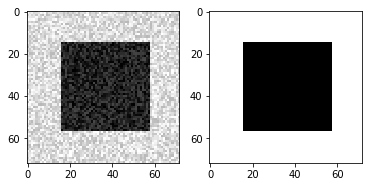

In [39]:
[noisy_X_train, X_train] = generate_dataset_noisy(300)
size = 72

fig = plt.figure()
X_plot = noisy_X_train[0].reshape(size,size)
ax1 = fig.add_subplot(1,2,1)
ax1.imshow(X_plot, cmap='gray')
X_plot_2 = X_train[0].reshape(size,size)
ax2 = fig.add_subplot(1,2,2)
ax2.imshow(X_plot_2, cmap='gray')
plt.show()

noisy_X_train = noisy_X_train.reshape(noisy_X_train.shape[0], size, size, 1)
X_train = X_train.reshape(X_train.shape[0], size, size, 1)

The network below predicts a noise-free image given a noisy image as input :

In [40]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model

input_img = Input(shape=(size, size, 1))  

x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
autoencoder.fit(noisy_X_train, X_train,
                epochs=40,
                batch_size=32)

Epoch 1/40
300/300 [==============================] - 3s 9ms/step - loss: 0.4822
Epoch 2/40
300/300 [==============================] - 3s 8ms/step - loss: 0.4081
Epoch 3/40
300/300 [==============================] - 3s 9ms/step - loss: 0.3921
Epoch 4/40
300/300 [==============================] - 3s 9ms/step - loss: 0.3583
Epoch 5/40
300/300 [==============================] - 2s 8ms/step - loss: 0.3144
Epoch 6/40
300/300 [==============================] - 2s 8ms/step - loss: 0.2662
Epoch 7/40
300/300 [==============================] - 2s 8ms/step - loss: 0.2313
Epoch 8/40
300/300 [==============================] - 3s 9ms/step - loss: 0.0965
Epoch 9/40
300/300 [==============================] - 2s 8ms/step - loss: 0.0352
Epoch 10/40
300/300 [==============================] - 3s 8ms/step - loss: 0.0539
Epoch 11/40
300/300 [==============================] - 3s 8ms/step - loss: 0.0383
Epoch 12/40
300/300 [==============================] - 3s 8ms/step - loss: 0.0274
Epoch 13/40
300/300 [====

We can visualize the predictions : 

In [74]:
[noisy_X_test, X_test] = generate_dataset_noisy(300)
noisy_X_test = noisy_X_test.reshape(noisy_X_test.shape[0],size,size,1)
X_test = X_test.reshape(X_test.shape[0],size,size,1)

In [75]:
denoising_X = autoencoder.predict(noisy_X_test)

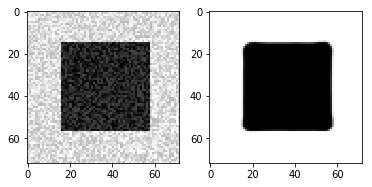

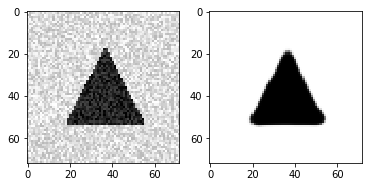

In [76]:
fig = plt.figure()
X_plot = noisy_X_test[0].reshape(size,size)
ax1 = fig.add_subplot(1,2,1)
ax1.imshow(X_plot, cmap='gray')
denoising_X_plot = denoising_X[0].reshape(size,size)
ax2 = fig.add_subplot(1,2,2)
ax2.imshow(denoising_X_plot, cmap='gray')

plt.show()

fig = plt.figure()
X_plot = noisy_X_test[1].reshape(size,size)
ax1 = fig.add_subplot(1,2,1)
ax1.imshow(X_plot, cmap='gray')
denoising_X_plot = denoising_X[1].reshape(size,size)
ax2 = fig.add_subplot(1,2,2)
ax2.imshow(denoising_X_plot, cmap='gray')

plt.show()